<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Base/HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import ydata_profiling
random.seed(42)
np.random.seed(42)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

Чтобы генератор псевдослучайных чисел возвращая одну и ту же последовательность мог нам обеспечить повторяемость результата

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [86]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [87]:
# 30 Отобразите 30 случайных строк тренировочного датасета.
print("30 случайных строк тренировочного датасета:")
display(df_train.sample(30))


30 случайных строк тренировочного датасета:


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [88]:

# Отобразите первые 5 и последние 5 объектов тестового датасета
print("первые 5 объектов тестового датасета")
display(df_test.head(5))
print("последние 5 объектов тестового датасета")
display(df_test.tail(5))


первые 5 объектов тестового датасета


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


последние 5 объектов тестового датасета


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


In [89]:
# Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
print("Пропуски в тренировочном датасете")
n1 = df_train.isna().sum()
c1 = n1[n1 > 0]
print(n1[n1 > 0])
print()
print("Пропуски в тестовом датасете")
n2 = df_test.isna().sum()
c2 = n2[n2 > 0]
print(n2[n2 > 0])
c = set(c1.index) | set(c2.index) #сохраняем набор колонок, где были пропуски
print(c)

Пропуски в тренировочном датасете
mileage      202
engine       202
max_power    196
torque       203
seats        202
dtype: int64

Пропуски в тестовом датасете
mileage      19
engine       19
max_power    19
torque       19
seats        19
dtype: int64
{'torque', 'seats', 'mileage', 'engine', 'max_power'}


In [90]:
# Посмотрите, есть ли в данных явные дубликаты
print(f"Дубликаты в тренировочном датасете: {df_train.duplicated().sum()}")
print(f"Дубликаты в тестовом датасете: {df_test.duplicated().sum()}")

Дубликаты в тренировочном датасете: 985
Дубликаты в тестовом датасете: 62


In [91]:
from ydata_profiling import ProfileReport

# Создаем и отображаем дашборд в ноутбуке
profile = ProfileReport(df_train, minimal=True, title="Cars Dataset EDA",  plot={'image_format': 'png'})
profile.to_file("cars_eda_report.html")  


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 37.09it/s]


Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [92]:
# Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо
# Медиану, очевидно, можно посчитать только для числовых значений (если не принимать в расчёт преобразования к числам и разделению колонки на значения и единицы измерения), то сначала определимся какие из колонок с пропусками числовые

for i in c:
    if i in df_train.columns:
        print(f"{i}: {df_train[i].dtype}")
    elif i in df_test.columns:
        print(f"{i}: {df_test[i].dtype}")
        


torque: object
seats: float64
mileage: object
engine: object
max_power: object


In [93]:
#Числовая одна колонка seats, с ней и будем работать
# Вычисляем медиану по тренировочному датасету
m = df_train['seats'].median()
print(f"Медиана: {m}")
        
# Заполняем пропуски в seats
df_train['seats'].fillna(m, inplace=True)
df_test['seats'].fillna(m, inplace=True)

# Проверяем, что пропусков в 'seats'нет
print("Пропуски в тренировочном датасете:")
n1 = df_train['seats'].isna().sum()
print("Пропуски в тестовом датасете:")
n2 = df_test['seats'].isna().sum()

Медиана: 5.0
Пропуски в тренировочном датасете:
Пропуски в тестовом датасете:


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_59208\4028297682.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['seats'].fillna(m, inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_59208\4028297682.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [94]:
# Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)

# Создаем список колонок кроме цены
f = []
for i in df_train.columns:
    if i != 'selling_price':
        f.append(i)

# Ищем дубликаты по этим колонкам
d = df_train.duplicated(subset=f, keep=False)

# Считаем сколько таких строк
n = 0
for i in d:
    if i == True:
        n = n + 1

# Выводим результат
print(f"Количество строк с одинаковыми признаками {n}")


Количество строк с одинаковыми признаками 1799


In [95]:

#Отобразите такие объекты
dr = df_train[d]
print("Дубликаты:")
display(dr.sort_values(by=f))

Дубликаты:


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1703,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
1836,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
117,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
5652,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
5753,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
5991,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


In [ ]:
# Удалите повторяющиеся строки. 
df_train = df_train.drop_duplicates(subset=f, keep='first')


In [ ]:
# Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков
df_train = df_train.reset_index(drop=True)

print(f"Размер тренировочного датасета после удаления дубликатов: {df_train.shape}")

Размер тренировочного датасета после удаления дубликатов: (5840, 13)


In [98]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [99]:
import pandas as pd

# Уберите единицы измерения для признаков ``mileage, engine, max_power``
# Приведите тип данных к ``float``.

def clear(a):
    # Преобразуем значение в строку и убираем пробелы по краям
    t = str(a).strip()
    
    # Проверяем, что строка не пустая
    if t != '':
        # Разделяем строку на части по пробелу
        parts = t.split(' ')
        
        # Берем первую часть (где должно быть число)
        first_part = parts[0]
        
        # Проверяем, можно ли преобразовать первую часть в число
        try:
            number = float(first_part)
            return number
        except ValueError:
            # Если не получилось преобразовать в число, возвращаем None
            return None
    
    # Если строка пустая, возвращаем None
    return None

for i in range(len(df_train)):
    df_train.loc[i, 'mileage'] = clear(df_train.loc[i, 'mileage'])
    df_train.loc[i, 'engine'] = clear(df_train.loc[i, 'engine'])
    df_train.loc[i, 'max_power'] = clear(df_train.loc[i, 'max_power'])

for i in range(len(df_test)):
    df_test.loc[i, 'mileage'] = clear(df_test.loc[i, 'mileage'])
    df_test.loc[i, 'engine'] = clear(df_test.loc[i, 'engine'])
    df_test.loc[i, 'max_power'] = clear(df_test.loc[i, 'max_power'])

# Преобразуем тип данных к float
df_train['mileage'] = pd.to_numeric(df_train['mileage'], errors='coerce')
df_train['engine'] = pd.to_numeric(df_train['engine'], errors='coerce')
df_train['max_power'] = pd.to_numeric(df_train['max_power'], errors='coerce')

df_test['mileage'] = pd.to_numeric(df_test['mileage'], errors='coerce')
df_test['engine'] = pd.to_numeric(df_test['engine'], errors='coerce')
df_test['max_power'] = pd.to_numeric(df_test['max_power'], errors='coerce')

#Удалите столбец ``torque``    
df_train = df_train.drop('torque', axis=1)
df_test = df_test.drop('torque', axis=1)

print("Типы данных df_train:")
print(df_train.dtypes)
print("\nТипы данных df_test:")
print(df_test.dtypes)

Типы данных df_train:
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

Типы данных df_test:
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [100]:
# Осуществите приведение столбцов к необходимому типу.
# Сначала преобразуем в числа поскольку есть пустые значения и NaN к числу преобразовать не сможем
df_train['engine'] = pd.to_numeric(df_train['engine'], errors='coerce')
df_train['seats'] = pd.to_numeric(df_train['seats'], errors='coerce')
df_test['engine'] = pd.to_numeric(df_test['engine'], errors='coerce')
df_test['seats'] = pd.to_numeric(df_test['seats'], errors='coerce')

# Заполняем и преобразуем
df_train['engine'] = df_train['engine'].fillna(0).astype(int)
df_train['seats'] = df_train['seats'].fillna(0).astype(int)
df_test['engine'] = df_test['engine'].fillna(0).astype(int)
df_test['seats'] = df_test['seats'].fillna(0).astype(int)

# Посмотрим что получилось
df_test.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats              int64
dtype: object

### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [101]:
# Посчитайте основные статистики по числовым столбцам для трейна и теста
# Статистики по числовым столбцам
print("Статистики по числовым столбцам тренировочного датасета:")
display(df_train.describe())

print("Статистики по числовым столбцам тестового датасета:")
display(df_test.describe())

Статистики по числовым столбцам тренировочного датасета:


,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5654.000000,5840.000000,5656.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.432842,1389.701027,88.103070,5.426712
std,4.095622,5.354320e+05,6.007114e+04,4.051002,546.195082,32.131943,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,0.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.800000,1193.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.370000,1248.000000,81.860000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.320000,1498.000000,100.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


Статистики по числовым столбцам тестового датасета:


,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000,1000.00000,981.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.338206,1431.16400,91.015627,5.403000
std,4.012149,7.585539e+05,48486.218662,3.989872,557.99609,35.207383,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.000000,0.00000,34.200000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.500000,1196.00000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.330000,1248.00000,83.100000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.320000,1582.00000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.00000,280.000000,9.000000


In [102]:
# Посчитайте основные статистики по категориальным столбцам для трейна и теста
# Статистики по категориальным столбцам
print("Статистики по категориальным столбцам тренировочного датасета:")
display(df_train.describe(include='object'))

print("Статистики по категориальным столбцам тестового датасета:")
display(df_test.describe(include='object'))

Статистики по категориальным столбцам тренировочного датасета:


,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


Статистики по категориальным столбцам тестового датасета:


,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


Выводы:
1. Числовые данные имеют разный масштаб, требуется нормализация
2. Есть очевидные выбросы: стоимость авто 10кк, нулевой объём двигателя, 2,36кк км пробега, etc.
3. Категориальные признаки заполнены разным количеством уникальных значений.
4. Свойства самих наборов в смысле уникальности авто отличаются: в тренировочном наборе уникальных около 33%, в тестовом 62%


In [103]:
assert df_train.shape == (5840, 12) #Очевидная ошибка в проверке, столбец torque мы уже удалили, поэтому 12

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

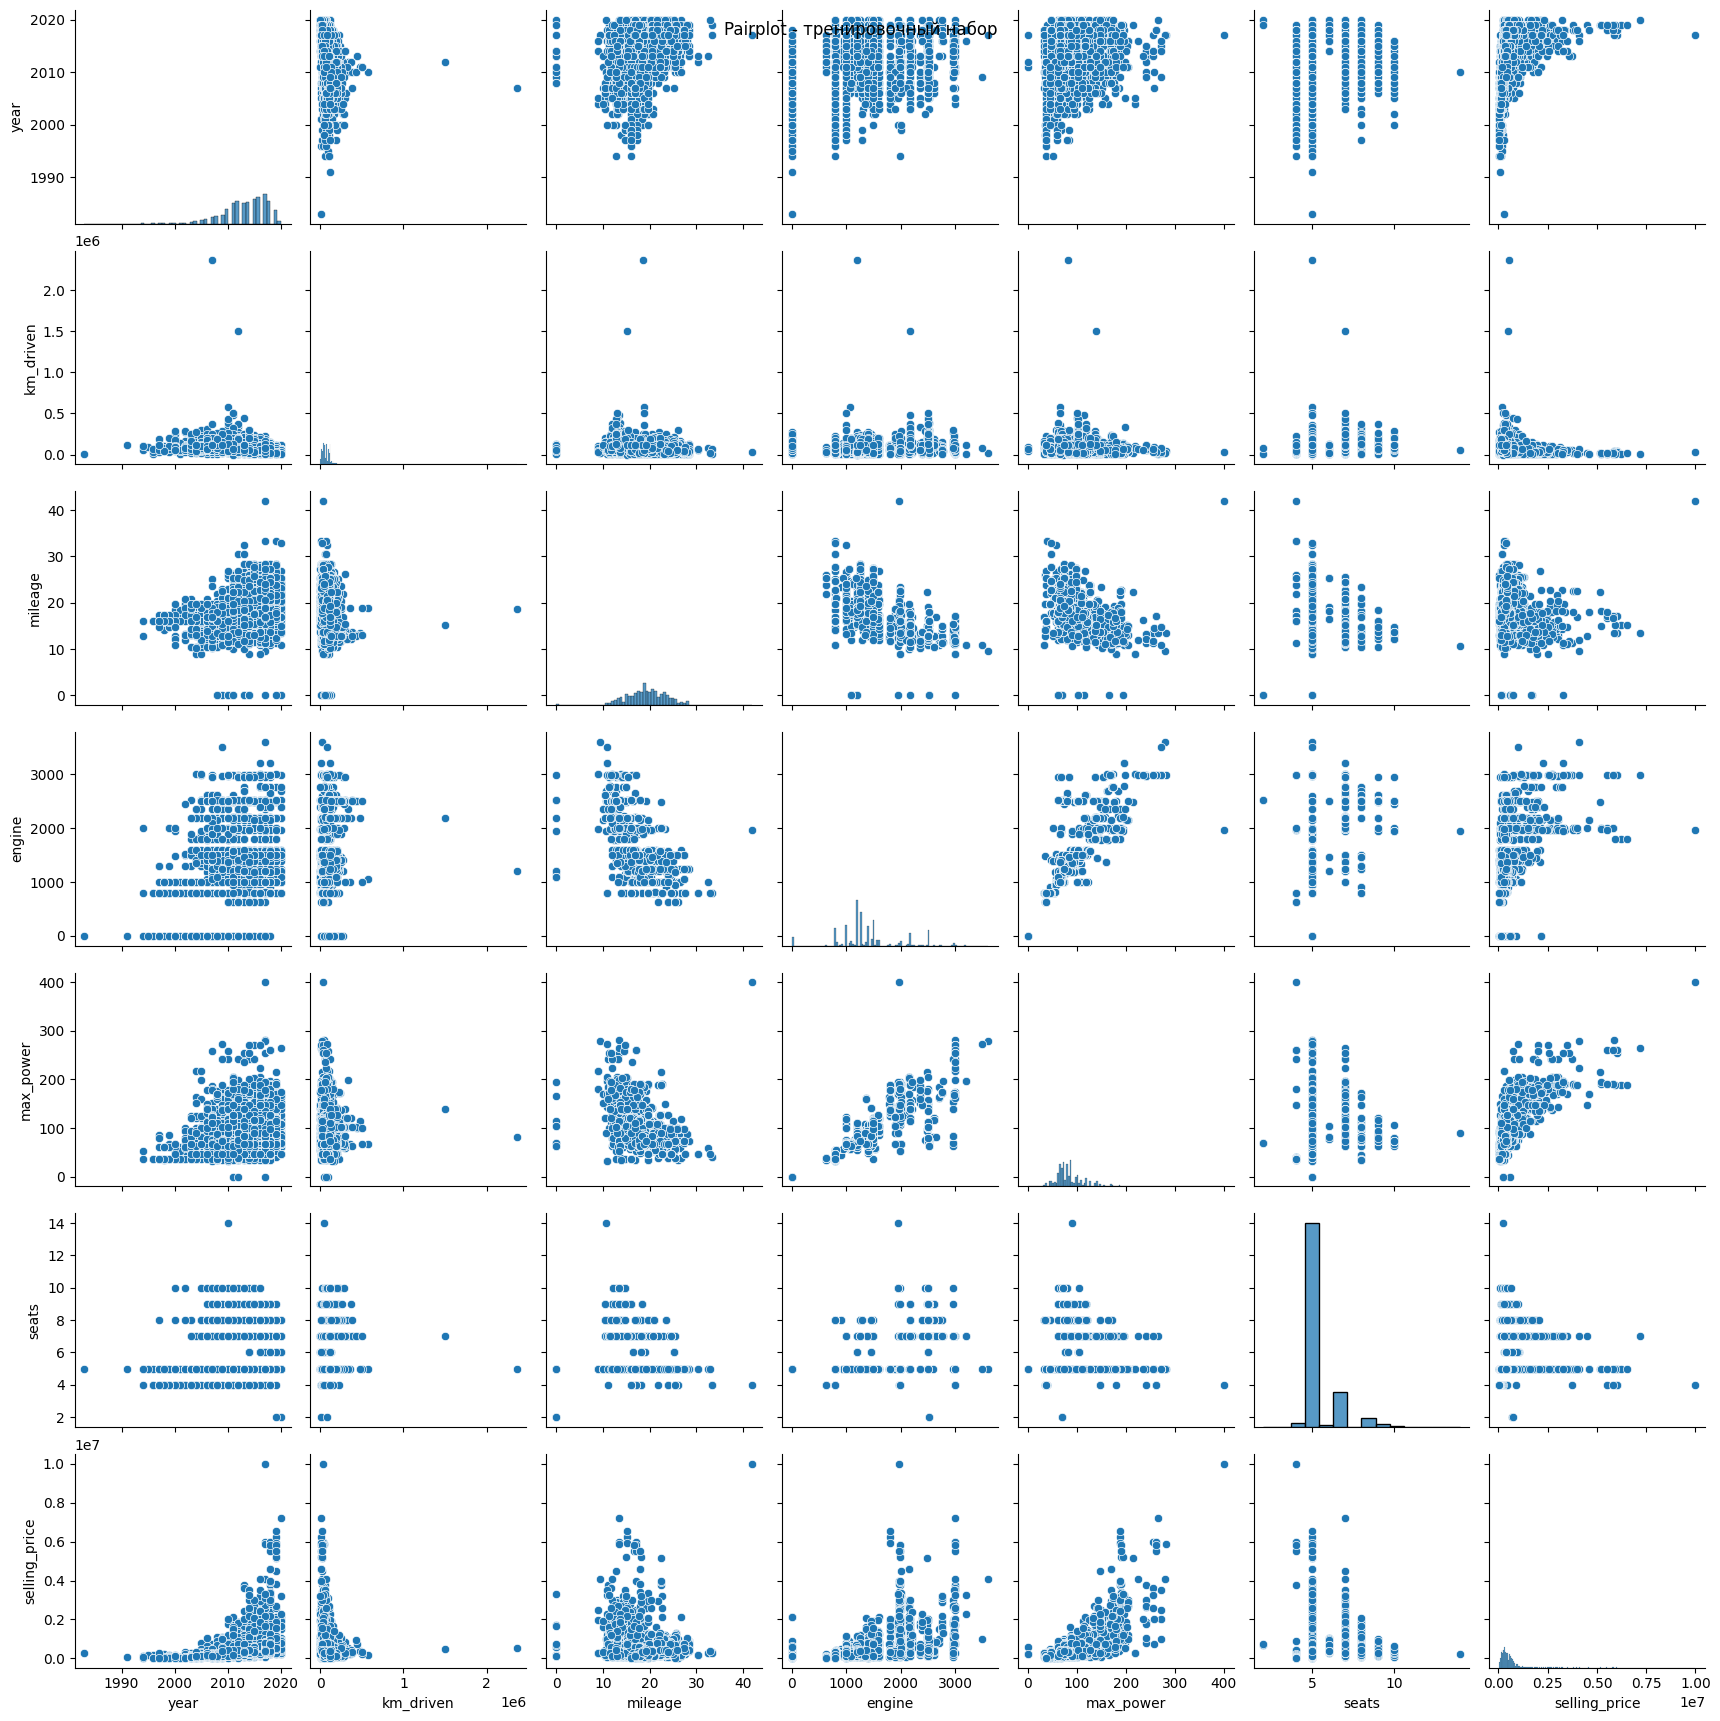

In [104]:
# Шаг 1: Графики для тренировочных данных
# Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`

# Создаем список числовых колонок для тренировочных данных
n = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

# Строим график попарных связей
sns.pairplot(df_train[n])
plt.suptitle('Pairplot - тренировочный набор')
plt.show()

По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
    Да, похоже, что сильнее всего с ценой связаны мощность двигателя, его объём и год выпуска. 
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?
   Очевидно, что мощность двигателя имеет сильную корреляцию с объёмом. Сильная отрицательная корреляция видна между расходом и объёмом двигателя, что также очевидно

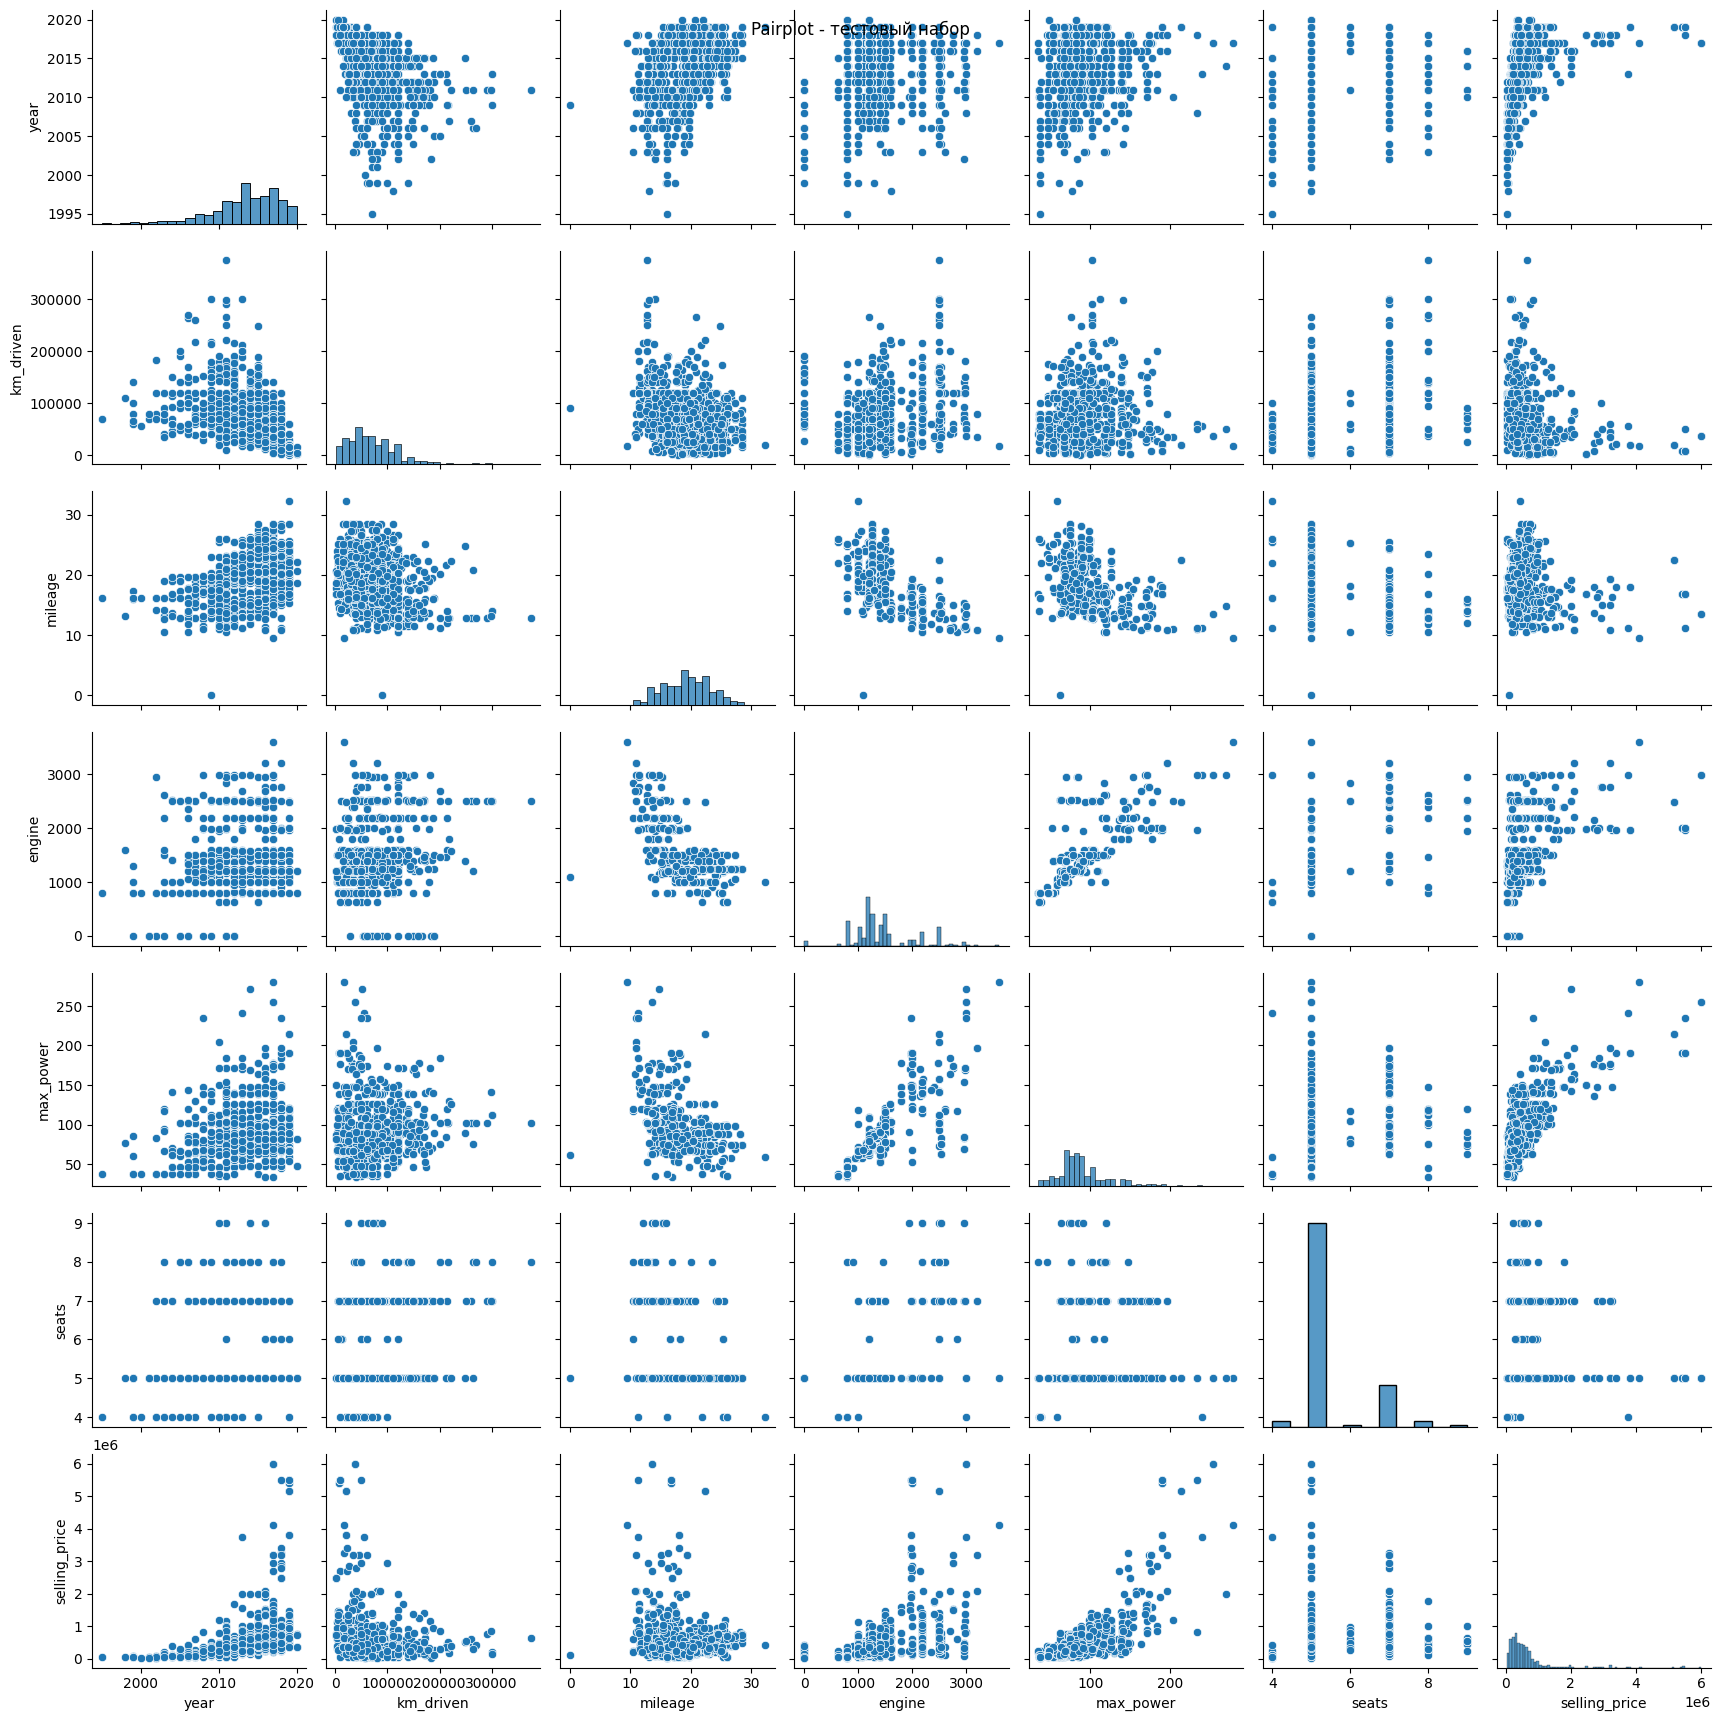

In [105]:
# Шаг 2.
# Постройте pairplot по тестовым данным

# Строим график попарных связей
sns.pairplot(df_test[n])
plt.suptitle('Pairplot - тестовый набор')
plt.show()

Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?" Да, в целом распределения оказались похожими, но тестовые данные выглядят более разреженными в силу меньшего размера самого датасета

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


<Axes: >

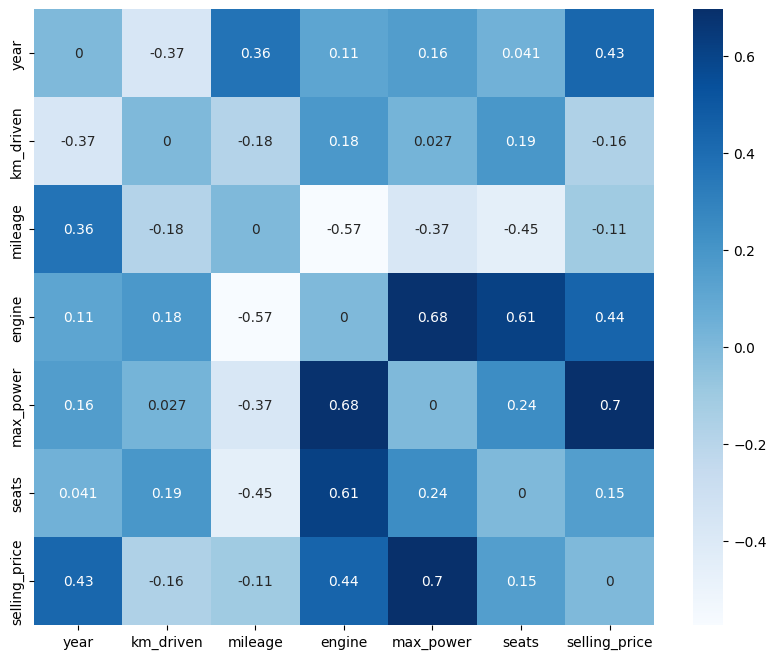

In [106]:
# Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
# Создаем копию матрицы корреляций
corr = df_train[n].corr()

# Скрываем автокорреляции (единицы на диагонали)
for i in range(len(corr)):
    corr.iloc[i, i] = 0  # Заменяем диагональные элементы на 0

# Рисуем тепловую карту корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="Blues", annot=True)


- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

1. Худшая корреляция между годом выпуска и числом мест около 0,041
2. Сильная положительная линейная зависимость между ценой и мощностью, объёмом двигателя и мощностью.
3. Да, верно, отрицательная корреляция -0,37 указывает на то, что чем меньше год, тем больше километров проехала машина к дате продажи

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

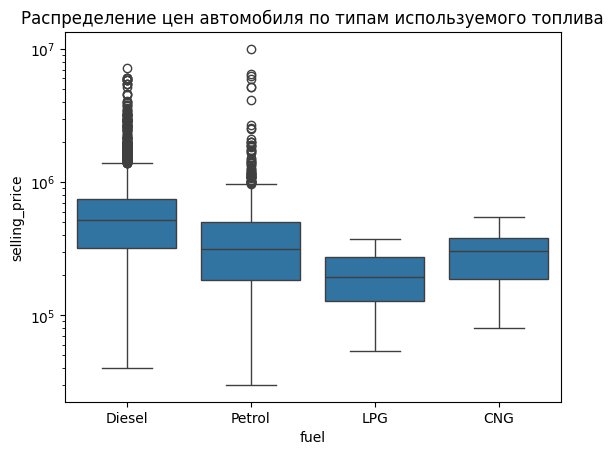

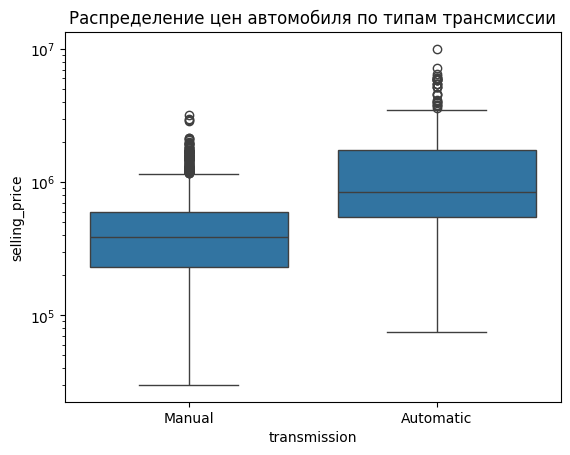

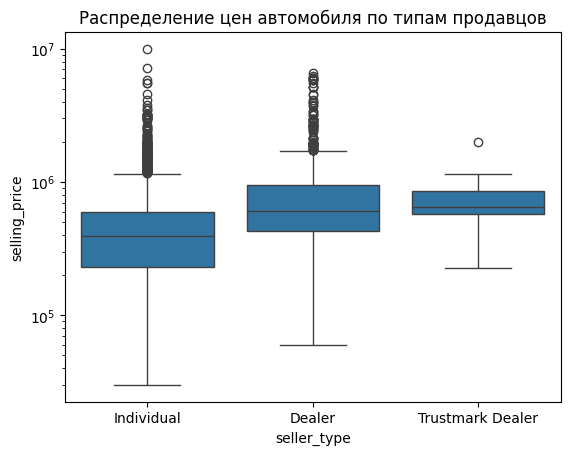

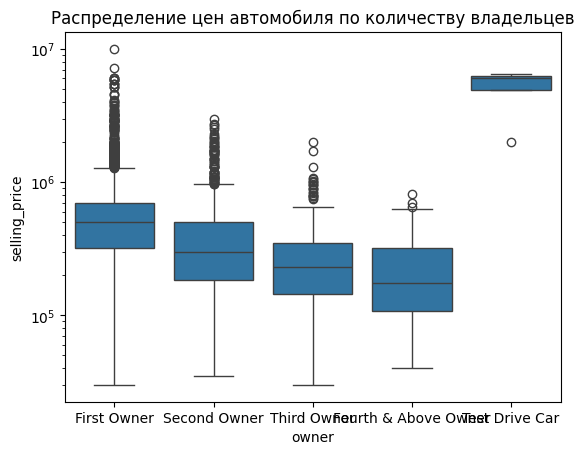

In [107]:
# Построим график связи используемого топлива, трансмиссии, продавца, владельца и цены автомобиля

sns.boxplot(data=df_train, x='fuel', y='selling_price')
plt.title('Распределение цен автомобиля по типам используемого топлива')
plt.yscale('log')
plt.show()

sns.boxplot(data=df_train, x='transmission', y='selling_price')
plt.title('Распределение цен автомобиля по типам трансмиссии')
plt.yscale('log')
plt.show()

sns.boxplot(data=df_train, x='seller_type', y='selling_price')
plt.title('Распределение цен автомобиля по типам продавцов')
plt.yscale('log')
plt.show()

sns.boxplot(data=df_train, x='owner', y='selling_price')
plt.title('Распределение цен автомобиля по количеству владельцев')
plt.yscale('log')
plt.show()

Хорошо видна зависимость: машины с дизельным двигателем в среднем продаются дороже, впрочем как и с автоматической коробкой передач, и с меньшим числом владельцев. Также дилерские продажи обеспечивают большую стоимость автомобиля, чем индивидуальные

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [108]:
# Мы помним, что у нас остались пропуски по числовым колонкам, которые стали числовыми после заполнения пропусков медианой. Вновь применим заполнение уже для поменявших тип значений, используя подход, опробованный ранее
# Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
print("Пропуски в тренировочном датасете")
n1 = df_train.isna().sum()
c1 = n1[n1 > 0]
print(n1[n1 > 0])
print()
print("Пропуски в тестовом датасете")
n2 = df_test.isna().sum()
c2 = n2[n2 > 0]
print(n2[n2 > 0])
c = set(c1.index) | set(c2.index) #сохраняем набор колонок, где были пропуски
print(c)

# Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо
# Медиану, очевидно, можно посчитать только для числовых значений (если не принимать в расчёт преобразования к числам и разделению колонки на значения и единицы измерения), то сначала определимся какие из колонок с пропусками числовые

for i in c:
    if i in df_train.columns:
        print(f"{i}: {df_train[i].dtype}")
    elif i in df_test.columns:
        print(f"{i}: {df_test[i].dtype}")

# Заполняем пропуски медианой по тренировочным данным
for i in c:
    # Вычисляем медиану по тренировочному датасету
    m = df_train[i].median()
    print(f"\nМедиана для {i}: {m}")
    
    # Заполняем пропуски в тренировочных данных
    df_train[i] = df_train[i].fillna(m)
    
    # Заполняем пропуски в тестовых данных
    df_test[i] = df_test[i].fillna(m)
    
    # Проверяем, что пропусков нет
    print(f"Пропуски в тренировочном датасете ({i}): {df_train[i].isna().sum()}")
    print(f"Пропуски в тестовом датасете ({i}): {df_test[i].isna().sum()}")

# Проверяем общие пропуски
print("\nОбщая проверка:")
print(f"Всего пропусков в тренировочном датасете: {df_train.isna().sum().sum()}")
print(f"Всего пропусков в тестовом датасете: {df_test.isna().sum().sum()}")

Пропуски в тренировочном датасете
mileage      186
max_power    184
dtype: int64

Пропуски в тестовом датасете
mileage      19
max_power    19
dtype: int64
{'max_power', 'mileage'}
max_power: float64
mileage: float64

Медиана для max_power: 81.86
Пропуски в тренировочном датасете (max_power): 0
Пропуски в тестовом датасете (max_power): 0

Медиана для mileage: 19.369999999999997
Пропуски в тренировочном датасете (mileage): 0
Пропуски в тестовом датасете (mileage): 0

Общая проверка:
Всего пропусков в тренировочном датасете: 0
Всего пропусков в тестовом датасете: 0


In [109]:
# Тренировочный набор
X_train = df_train.select_dtypes(include=['int64', 'float64']).copy() # Создаем копии с только вещественными признаками
X_train = X_train.drop(columns=['seats','selling_price' ]) # вдогонку удаляем seats и selling_price
print(X_train.dtypes) # смотрим что получилось
y_train = df_train['selling_price']


year           int64
km_driven      int64
mileage      float64
engine         int64
max_power    float64
dtype: object


In [110]:
# опишите выбранные вещественные признаки
print(X_train.shape)
print(X_train.head)

(5840, 5)
<bound method NDFrame.head of       year  km_driven  mileage  engine  max_power
0     2014     145500    23.40    1248      74.00
1     2014     120000    21.14    1498     103.52
2     2010     127000    23.00    1396      90.00
3     2007     120000    16.10    1298      88.20
4     2017      45000    20.14    1197      81.86
...    ...        ...      ...     ...        ...
5835  2008     191000    17.92    1086      62.10
5836  2013      50000    18.90     998      67.10
5837  2013     110000    18.50    1197      82.85
5838  2007     119000    16.80    1493     110.00
5839  2009     120000    19.30    1248      73.90

[5840 rows x 5 columns]>


In [111]:
# Тестовый набор
X_test = df_test.select_dtypes(include=['int64', 'float64']).copy()
X_test = X_test.drop(columns=['seats', 'selling_price']) 
print(X_test.dtypes)
y_test = df_test['selling_price']

year           int64
km_driven      int64
mileage      float64
engine         int64
max_power    float64
dtype: object


### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [112]:
# Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте R^2 и MSE для трейна и для теста.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# Создаем и обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Делаем прогноз
y_train_for= model.predict(X_train)
y_test_for = model.predict(X_test)

# R^2 и MSE для трейна
r2_train = r2_score(y_train, y_train_for)
print(f"R^2 для тренировочного набора = {r2_train:.4f}")
mse_train = MSE(y_train, y_train_for)
print(f"MSE для тренировочного набора = {mse_train:.4f}")

# R^2 и MSE для теста
r2_test = r2_score(y_test, y_test_for)
print(f"R^2 для тестового набора = {r2_test:.4f}")
mse_test = MSE(y_test, y_test_for)
print(f"MSE для тестового набора = {mse_test:.4f}")

R^2 для тренировочного набора = 0.5901
MSE для тренировочного набора = 117486467298.4133
R^2 для тестового набора = 0.5916
MSE для тестового набора = 234760111511.4218


### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [113]:
from sklearn.preprocessing import StandardScaler
# Выбираем только числовые колонки
n = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# ОБУЧАЕМ стандартизатор ТОЛЬКО на тренировочных данных
scaler= StandardScaler()
scaler.fit(X_train[n])

# Преобразуем тренировочные и тестовые данные
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[n] = scaler.transform(X_train[n])
X_test_scaled[n] = scaler.transform(X_test[n])

# Создаем и обучаем модель линейной регрессии на стандартизированных данных
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Делаем прогноз
y_train_for = model.predict(X_train_scaled)
y_test_for = model.predict(X_test_scaled)

# R^2 и MSE для трейна
r2_train = r2_score(y_train, y_train_for)
print(f"R^2 для тренировочного набора = {r2_train:.4f}")
mse_train = MSE(y_train, y_train_for)
print(f"MSE для тренировочного набора = {mse_train:.4f}")

# R^2 и MSE для теста
r2_test = r2_score(y_test, y_test_for)
print(f"R^2 для тестового набора = {r2_test:.4f}")
mse_test = MSE(y_test, y_test_for)
print(f"MSE для тестового набора = {mse_test:.4f}")


R^2 для тренировочного набора = 0.5901
MSE для тренировочного набора = 117486467298.4136
R^2 для тестового набора = 0.5916
MSE для тестового набора = 234760111511.4144


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?


Коэффициенты Lasso модели: [147042.91292849 -42303.76718248  27488.76918473  26708.1140593
 342534.41345356]
Самый важный признак: max_power


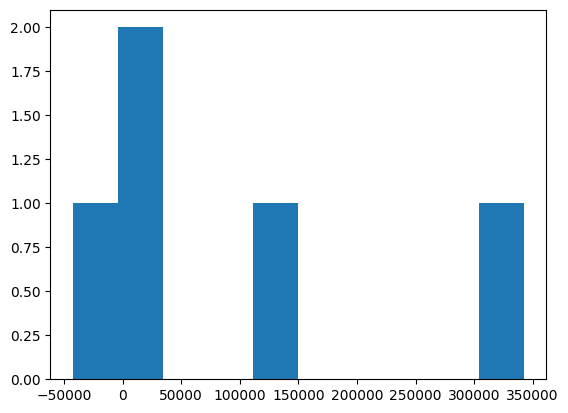

In [114]:
from matplotlib import pyplot as plt

print(f"\nКоэффициенты Lasso модели: {model.coef_}")

# построим график
plt.hist(model.coef_)

# находим номер самого важного признака
i= np.abs(model.coef_).argmax()

# 3. Получаем название
print(f"Самый важный признак: {X_train_scaled.columns[i]}")

Неожиданный вывод - мощность двигателя более всего влияет на стоимость автомобиля

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [115]:
# Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
from sklearn.linear_model import Lasso

model_l1 = Lasso(alpha = 1)
model_l1.fit(X_train_scaled, y_train)

# Делаем прогноз
y_train_for_l1 = model_l1.predict(X_train_scaled)
y_test_for_l1 = model_l1.predict(X_test_scaled)


# R^2 и MSE для трейна

print(f"R^2 для тренировочного набора = {r2_score(y_train, y_train_for_l1):.4f}")
print(f"MSE для тренировочного набора = {MSE(y_train, y_train_for_l1):.4f}")

# R^2 и MSE для теста
print(f"R^2 для тестового набора = {r2_score(y_test, y_test_for_l1):.4f}")
print(f"MSE для тестового набора = {MSE(y_test, y_test_for_l1):.4f}")


R^2 для тренировочного набора = 0.5901
MSE для тренировочного набора = 117486467304.0089
R^2 для тестового набора = 0.5916
MSE для тестового набора = 234760630729.1888


In [116]:
# Проверяем, занулились ли какие-то веса
print(f"\nКоэффициенты Lasso модели: {model_l1.coef_}")
print(f"Обнуленных коэффициентов: {sum(model_l1.coef_ == 0)}")


Коэффициенты Lasso модели: [147043.47756748 -42302.59956691  27486.50188674  26706.15721565
 342533.66787696]
Обнуленных коэффициентов: 0


Поскольку все веса были большими и самих признаков не много, то L1 регуляризация не обнуляет ни один признак, значит все важны для модели, хотя видим, что 2 веса сильно уменьшились

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [117]:
from sklearn.model_selection import GridSearchCV

# Определяем сетку параметров для Lasso
params = {'alpha': [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 20, 50, 100, 1000, 10000]}

# Создаем модель для Lasso
model = Lasso(random_state = 42, max_iter = 10000)

# GridSearchCV с 10 фолдами
gs = GridSearchCV(model, params, cv=10, scoring='neg_mean_squared_error')

gs.fit(X_train_scaled, y_train)

# лучшая модель
best = gs.best_estimator_

In [118]:
y_for_Lasso_tuned = best.predict(X_test_scaled)

print(f"R^2 для (Lasso, tuned) = {r2_score(y_test, y_for_Lasso_tuned):.4f}")
print(f"MSE для (Lasso, tuned) = {MSE(y_test, y_for_Lasso_tuned):.4f}")

R^2 для (Lasso, tuned) = 0.5907
MSE для (Lasso, tuned) = 235284350334.8527


In [119]:
print(f"\nКоэффициенты Lasso регрессии модели: {best.alpha}")


Коэффициенты Lasso регрессии модели: 1000


In [120]:
for i, coef in enumerate(best.coef_):
    print(f"   Feature_{i}: {coef:.6f}")

   Feature_0: 147562.182138
   Feature_1: -41138.165034
   Feature_2: 25258.516417
   Feature_3: 24745.551271
   Feature_4: 341813.395940


 - Сколько грид-сёрчу пришлось обучать моделей? 13 * 10 = 130 моделей
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? лучший коэффициент регуляризации = 1000
 - Занулились ли какие-нибудь из весов при такой регуляризации?

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [121]:
from sklearn.linear_model import ElasticNet

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 20, 50, 100, 1000, 10000], 
    'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1] 
}

elastic_net = ElasticNet(random_state=42, max_iter=10000) 
elastic_net.fit(X_train_scaled, y_train)

# GridSearchCV с 10 фолдами
gs = GridSearchCV(elastic_net, param_grid, cv=10, scoring='neg_mean_squared_error')

gs.fit(X_train_scaled, y_train)

# лучшая модель
best = gs.best_estimator_

C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.565e+14, tolerance: 1.247e+11
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.208e+14, tolerance: 1.564e+11
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemente

In [122]:
y_for_ElasticNet_tuned = best.predict(X_test_scaled)

print(f"R^2 для ElasticNet = {r2_score(y_test, y_for_ElasticNet_tuned):.4f}")
print(f"MSE для ElasticNet = {MSE(y_test, y_for_ElasticNet_tuned):.4f}")

R^2 для ElasticNet = 0.5907
MSE для ElasticNet = 235284350334.8527


In [123]:
print(f"\nКоэффициенты alpha ElasticNet регрессии модели: {best.alpha}")
print(f"\nКоэффициенты l1_ratio ElasticNet регрессии модели: {best.l1_ratio}")



Коэффициенты alpha ElasticNet регрессии модели: 1000

Коэффициенты l1_ratio ElasticNet регрессии модели: 1


In [124]:
for i, coef in enumerate(best.coef_):
    print(f"   Feature_{i}: {coef:.6f}")

   Feature_0: 147562.182138
   Feature_1: -41138.165034
   Feature_2: 25258.516417
   Feature_3: 24745.551271
   Feature_4: 341813.395940


 - Сколько грид-сёрчу пришлось обучать моделей? 13 * 11 * 10 = 1430 моделей
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей? alpha = 0,01 l1_ratio = 0,5

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [125]:
# Тренировочный набор

X_train_cat = df_train.drop(columns=['selling_price', 'name'])
y_train_cat = df_train['selling_price']
X_test_cat = df_test.drop(columns=['selling_price', 'name'])
y_test_cat = df_test['selling_price']
X_train_cat.dtypes

year              int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
mileage         float64
engine            int64
max_power       float64
seats             int64
dtype: object

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [126]:
assert X_train_cat.shape == (5840, 10)

In [127]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [128]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# Преобразуем seats в строковый тип
X_train_cat['seats'] = X_train_cat['seats'].astype(str)
X_test_cat['seats'] = X_test_cat['seats'].astype(str)

# Определяем категориальные признаки (включая seats)
categorical_cols = X_train_cat.select_dtypes(include=['object']).columns.tolist()

# Создаем и применяем OneHotEncoder с drop='first'
one_hot_enc = OneHotEncoder(drop='first', sparse_output=False)

# Кодируем данные
X_train_encoded = one_hot_enc.fit_transform(X_train_cat[categorical_cols])
X_test_encoded = one_hot_enc.transform(X_test_cat[categorical_cols])

# Получаем имена новых признаков
encoded_feature_names = one_hot_enc.get_feature_names_out(categorical_cols)

print(f"Исходные категориальные признаки: {categorical_cols}")
print(f"Новых признаков после OneHot кодирования: {len(encoded_feature_names)}")
print(f"Пример имен признаков: {encoded_feature_names[:5]}")

# Получаем числовые признаки
numeric_cols = X_train_cat.select_dtypes(include=['int64', 'float64']).columns.tolist()
X_train_numeric = X_train_cat[numeric_cols].values
X_test_numeric = X_test_cat[numeric_cols].values

# Объедининянем числовые и категориальные признаки
X_train_combined = np.hstack([X_train_numeric, X_train_encoded])
X_test_combined = np.hstack([X_test_numeric, X_test_encoded])

Исходные категориальные признаки: ['fuel', 'seller_type', 'transmission', 'owner', 'seats']
Новых признаков после OneHot кодирования: 18
Пример имен признаков: ['fuel_Diesel' 'fuel_LPG' 'fuel_Petrol' 'seller_type_Individual'
 'seller_type_Trustmark Dealer']


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [129]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Определяем сетку параметров для alpha
param_grid = {'alpha': [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 20, 50, 100, 1000, 10000]}
ridge = Ridge(random_state=42, max_iter=10000)
ridge.fit(X_train_combined, y_train_cat)

gs = GridSearchCV(ridge, param_grid, cv = 10, scoring='r2')

gs.fit(X_train_combined, y_train_cat)

# лучшая модель
best = gs.best_estimator_

# Предсказание и оценка
y_for_ridge = best.predict(X_test_combined)
mse_ridge = MSE(y_test_cat, y_for_ridge)
r2_ridge = r2_score(y_test_cat, y_for_ridge)


print(f"R^2 для Ridge = {r2_score(y_test_cat, y_for_ridge):.4f}")
print(f"MSE для Ridge = {MSE(y_test_cat, y_for_ridge):.4f}")

C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=5.05854e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


R^2 для Ridge = 0.6449
MSE для Ridge = 204100768659.3242


Судя по подению коэффициента, качество прогнозов только ухудшилось, несмотря на уменьшение СКО.

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [130]:
def business_metric(y_true, y_pred):
    errors = np.abs((y_true - y_pred) / y_true)
    within_10 = np.sum(errors <= 0.1)
    return within_10 / len(y_true)

# Lasso
lasso_score = business_metric(y_test, y_for_Lasso_tuned)
print(f"Lasso: {lasso_score:.3f}")

# ElasticNet
elasticnet_score = business_metric(y_test, y_for_ElasticNet_tuned)
print(f"ElasticNet: {elasticnet_score:.3f}")

# Ridge
ridge_score = business_metric(y_test_cat, y_for_ridge)
print(f"Ridge: {ridge_score:.3f}")


Lasso: 0.235
ElasticNet: 0.235
Ridge: 0.239


Лучшая модель неожиданно Lasso

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.



### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.